In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import pickle

/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig1"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# Latest

In [4]:
FILE_NAME = "adata_combined_new.h5ad.final.filtered.withvalidation"
PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
adata_5k=sc.read_h5ad(PATH2)

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata_5k.var_names]
    return LIST




adata_5k.obs.Site_status.value_counts()



Site_status
Non-lesional                         1509239
Lesional                              568318
Validation_dataset                    295228
Healthy                               202749
3D_Week12                             180311
3D_Lesional_baseline                  153479
Week 12                               139631
PostRx                                 96485
Psoriasis_replicate_non-lesional       76048
Week 8 Psoriasis                       72094
Psoriasis_replicate_Lesional           60647
Psoriasis_replicate_PostRx             49385
Day 14_HF                              30438
PostRx-Lesional Dupilumab (16 wk)       6694
PostRx-Lesional Dupilumab (1 yr)        4226
Name: count, dtype: int64

In [7]:
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"]

In [8]:
adata_5k[adata_5k.obs["Site_status"]=="Week 8 Psoriasis"].obs.info_id6.value_counts()

info_id6
Week 8 (resolved)_CE5-SKI-27-FO-4-S22-E1      18088
Week 8 (resolved)_CE3-SKI-28-FO-4-S22-E1_a    12801
Week 8 (resolved)_CE4-SKI-27-FO-3-S22-E2_b    11694
Week 8 (resolved)_CE4-SKI-27-FO-3-S22-E2_a    11135
Week 8 (resolved)_CE3-SKI-28-FO-4-S22-E1_b     9924
Week 8 (resolved)_CE6-SKI-28-FO-3-S22-E2       8452
Name: count, dtype: int64

In [9]:
adata_5k.obs["Site_status"].value_counts()

Site_status
Non-lesional                        365837
Validation_dataset                  295228
Lesional                            231621
3D_Week12                           180311
3D_Lesional_baseline                153479
Week 12                             139631
Psoriasis_replicate_non-lesional     76048
Week 8 Psoriasis                     72094
Psoriasis_replicate_Lesional         60647
Healthy                              59315
Psoriasis_replicate_PostRx           49385
Day 14_HF                            30438
Name: count, dtype: int64

In [10]:
adata_5k = adata_5k[adata_5k.obs["Site_status"].isin(["Non-lesional",
                                                      "Psoriasis_replicate_PostRx",
                                                     "Psoriasis_replicate_non-lesional",
                                                      "Week 8 Psoriasis",
                                                      "Healthy"
                                                     
                                                     ])]

In [12]:
counts = adata_5k.obs["niche19"].value_counts()
keep = counts[counts > 10].index
adata_5k =adata_5k[adata_5k.obs["niche19"].isin(keep)]
adata_5k.obs["niche19"].value_counts()

niche19
Small_BV                    147658
Epidermis_basal              96035
Papillary_dermis             62835
Epidermis_late               55900
Epidermis_mid                42508
Reticular_dermis             41322
Muscle                       22931
Sweat_gland                  21649
Sweat_gland_channel          19715
Sebaceous_duct               16801
Reticular_dermis_LE_rich     15050
EpidermisInflamm_mid         13925
Large_BV                     13417
Perineural                   12336
HF_outer                     11165
Sebaceous_gland              10387
Tzone-like                    8157
Hypodermis                    8091
HF_inner                      1024
VenuleMuscle                   717
Sebaceous_immune               607
EpidermisInflamm_late          180
Epidermis_basal_cycling        146
Plasma_cell_rich                74
Epidermis_APChi                 36
Name: count, dtype: int64

In [13]:

path = "/nfs/team298/ls34/niche_colors.pkl"
with open(path, "rb") as f:
    colors_new2 = pickle.load(f)
colors=colors_new2

/tmp/ipykernel_690656/1724178810.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_5k.obs.groupby(["niche19", "info_id6"])
/tmp/ipykernel_690656/1724178810.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct.groupby("niche19")["info_id6"]
/tmp/ipykernel_690656/1724178810.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(donor_counts.index, rotation=90, ha="right", fontsize=12)


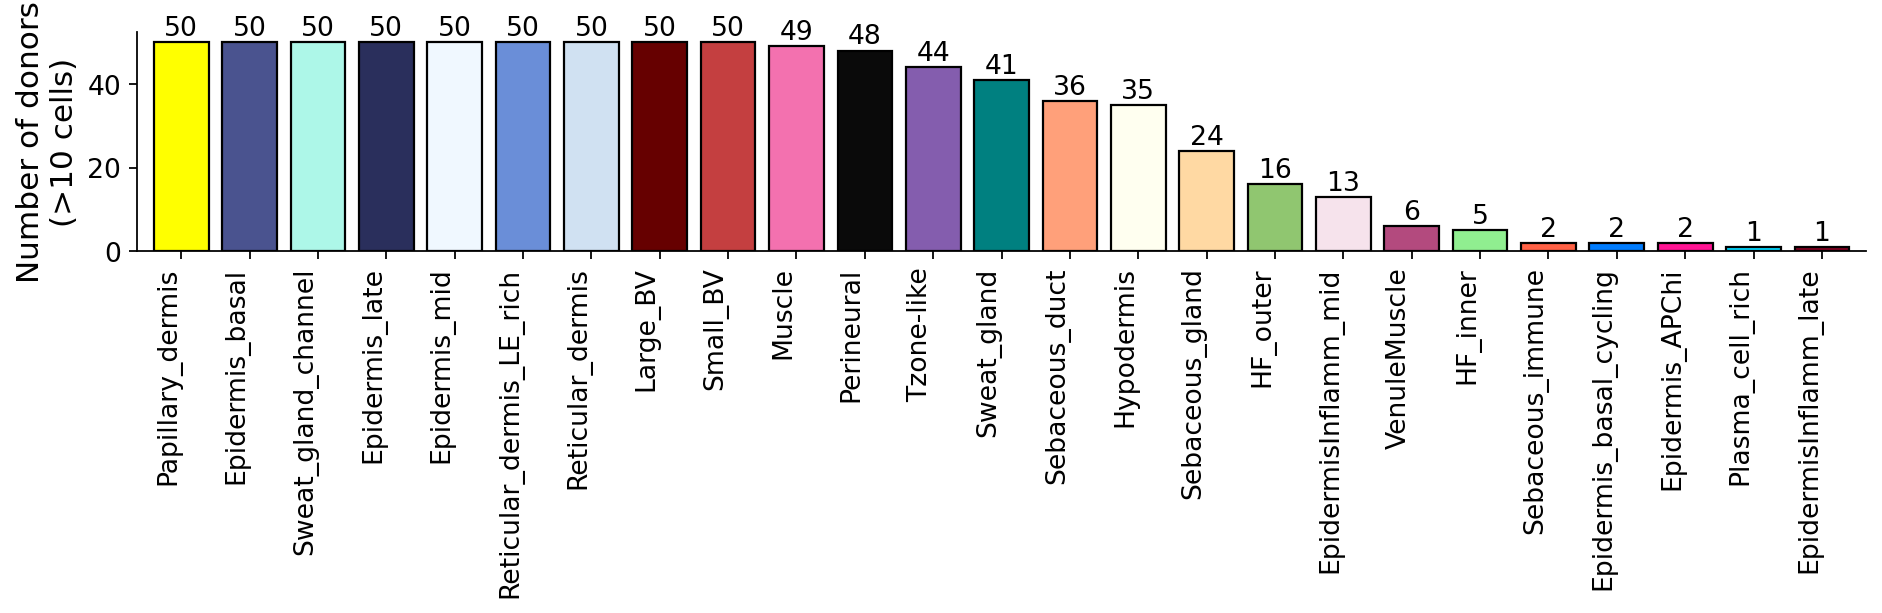

In [14]:
# ─────────────────────────────────────────────────────────────
# 1 · Count donors (>10 cells) per niche
# ─────────────────────────────────────────────────────────────
ct = (
    adata_5k.obs.groupby(["niche19", "info_id6"])
               .size()
               .reset_index(name="cells")
)

# keep donor–niche combos with >10 cells
ct = ct[ct["cells"] > 10]

# number of donors per niche
donor_counts = (
    ct.groupby("niche19")["info_id6"]
      .nunique()
      .sort_values(ascending=False)
)

# colours
bar_colors = [colors.get(n, "grey") for n in donor_counts.index]

# ─────────────────────────────────────────────────────────────
# 2 · Bar chart
# ─────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar(
    donor_counts.index,
    donor_counts.values,
    color=bar_colors,
    edgecolor="black"
)

# label bars
for x, y in zip(donor_counts.index, donor_counts.values):
    ax.text(x, y + 0.2, str(y), ha="center", va="bottom", fontsize=12)

# remove extra whitespace between y-axis and first bar
plt.margins(x=0.01)

# tidy up labels and appearance
ax.set_ylabel("Number of donors\n(>10 cells)", fontsize=14)
ax.set_xlabel("")  # remove x-label
ax.set_title("", fontsize=16)
ax.set_xticklabels(donor_counts.index, rotation=90, ha="right", fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# remove junk
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.savefig("supp/nichedonorcount.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [16]:
113 - 50 - 17

46

In [15]:
stop

NameError: name 'stop' is not defined

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # ─────────────────────────────────────────────────────────────
# # 1 · Count donors (>10 cells) per niche
# # ─────────────────────────────────────────────────────────────
# # cells per (niche, donor)
# ct = (
#     adata_5k.obs.groupby(["niche19", "info_id6"])
#                .size()
#                .reset_index(name="cells")
# )
# a
# # keep donor–niche combos with >10 cells
# ct = ct[ct["cells"] > 10]

# # number of donors per niche
# donor_counts = (
#     ct.groupby("niche19")["info_id6"]
#       .nunique()
#       .sort_values(ascending=False)    # tall bars first (optional)
# )

# # colour list matching the dict `colors`
# bar_colors = [colors.get(n, "grey") for n in donor_counts.index]

# # ─────────────────────────────────────────────────────────────
# # 2 · Bar chart
# # ─────────────────────────────────────────────────────────────
# fig, ax = plt.subplots(figsize=(12, 4))

# ax.bar(donor_counts.index, donor_counts.values,
#        color=bar_colors, edgecolor="black")

# # label bars with counts
# for x, y in zip(donor_counts.index, donor_counts.values):
#     ax.text(x, y + 0.1, str(y), ha="center", va="bottom", fontsize=9)

# ax.set_ylabel("Number of donors\n(>10 cells)", fontsize=12)
# ax.set_xlabel("Niche12", fontsize=12)
# ax.set_title("Donors contributing >10 cells per niche", fontsize=14)

# ax.set_xticklabels(donor_counts.index, rotation=90, ha="right", fontsize=9)
# ax.grid(False)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# plt.tight_layout()
# plt.show()

In [ ]:
# syop

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ─────────────────────────────────────────────────────────────
# 0 · Shared helpers
# ─────────────────────────────────────────────────────────────
def donor_counts_for(df):
    """
    Return Series(count donors) indexed by niche12, sorted tall→short.
    """
    ct = (
        df.groupby(["niche12", "info_id2"])
          .size()
          .reset_index(name="cells")
    )
    ct = ct[ct["cells"] > 10]                     # keep donor–niche combos
    return (
        ct.groupby("niche12")["info_id2"]
          .nunique()
          .sort_values(ascending=False)
    )

# ─────────────────────────────────────────────────────────────
# 1 · Compute per-disease donor counts
# ─────────────────────────────────────────────────────────────
diseases = adata_5k.obs["disease_overall"].unique()
donor_tables = {}

for dis in diseases:
    mask = adata_5k.obs["disease_overall"] == dis
    donor_tables[dis] = donor_counts_for(adata_5k.obs.loc[mask])

# unify x-axis order: union of all niches, keep overall frequency order
all_niches = (
    pd.concat(donor_tables.values())
      .groupby(level=0).sum()
      .sort_values(ascending=False)
      .index
)

# ─────────────────────────────────────────────────────────────
# 2 · One bar plot per disease, same row
# ─────────────────────────────────────────────────────────────
fig_w = 4 * len(diseases)
fig, axes = plt.subplots(1, len(diseases),
                         figsize=(fig_w, 4),
                         sharey=True)

if len(diseases) == 1:            # matplotlib returns a single Axes
    axes = [axes]

for ax, dis in zip(axes, diseases):
    counts = donor_tables[dis].reindex(all_niches).fillna(0)
    colors_bar = [colors.get(n, "grey") for n in counts.index]

    ax.bar(counts.index, counts.values,
           color=colors_bar, edgecolor="black")

    # counts above bars
    for x, y in zip(counts.index, counts.values):
        if y:                                          # skip zero bars
            ax.text(x, y + 0.2, int(y),
                    ha="center", va="bottom", fontsize=8)

    ax.set_title(dis, fontsize=13)
    ax.set_xlabel("Niche12", fontsize=11)
    ax.set_xticklabels(counts.index,
                       rotation=90, ha="right", fontsize=8)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Donors with >10 cells", fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# colour dictionary you built earlier:  colors

# ─────────────────────────────────────────────────────────────
# 0 · Helper – % of donors per niche (>10-cell rule)
# ─────────────────────────────────────────────────────────────
def donor_percentage(obs_subset: pd.DataFrame) -> pd.Series:
    """
    For one disease group, return a Series (% donors) indexed by niche12.
    A donor counts for a niche if they contribute >10 cells to that niche.
    """
    ct = (
        obs_subset.groupby(["niche12", "info_id2"])
                  .size()
                  .reset_index(name="cells")
    )
    ct = ct[ct["cells"] > 10]                       # qualifying donor–niche pairs

    donors_per_niche = ct.groupby("niche12")["info_id2"].nunique()
    total_donors     = obs_subset["info_id2"].nunique()

    return (donors_per_niche / total_donors * 100).sort_values(ascending=False)


# ─────────────────────────────────────────────────────────────
# 1 · Compute % table for each disease
# ─────────────────────────────────────────────────────────────
diseases       = adata_5k.obs["disease_overall"].unique()
percent_tables = {
    dis: donor_percentage(adata_5k.obs.loc[adata_5k.obs["disease_overall"] == dis])
    for dis in diseases
}

# consistent x-axis order: union of niches, ordered by overall prevalence
all_niches = (
    pd.concat(percent_tables.values())
      .groupby(level=0).mean()
      .sort_values(ascending=False)
      .index
)

# ─────────────────────────────────────────────────────────────
# 2 · One subplot per disease (same row)
# ─────────────────────────────────────────────────────────────
fig_w = 4 * len(diseases)
fig, axes = plt.subplots(1, len(diseases), figsize=(fig_w, 4), sharey=True)
axes = np.atleast_1d(axes)      # ensure iterable even when n=1

for ax, dis in zip(axes, diseases):
    pct = percent_tables[dis].reindex(all_niches).fillna(0)
    bar_cols = [colors.get(n, "grey") for n in pct.index]

    ax.bar(pct.index, pct.values, color=bar_cols, edgecolor="black")

    ax.set_title(dis, fontsize=13)
    ax.set_xlabel("Niche12", fontsize=11)
    ax.set_xticklabels(pct.index, rotation=90, ha="right", fontsize=8)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Donors with >10 cells  (%)", fontsize=11)

plt.tight_layout()
fig.savefig("fig2/fig_2c.pdf", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# colour dictionary for niches
# colors = {...}

# ─────────────────────────────────────────────────────────────
# 0 · Helper – % of donors per niche (>10-cell rule)
# ─────────────────────────────────────────────────────────────
def donor_percentage(obs_subset: pd.DataFrame) -> pd.Series:
    """
    For one disease group, return a Series (% donors) indexed by niche12.
    A donor counts for a niche if they contribute >10 cells to that niche.
    """
    ct = (
        obs_subset.groupby(["niche12", "info_id2"])
                  .size()
                  .reset_index(name="cells")
    )
    ct = ct[ct["cells"] > 10]                       # qualifying donor–niche pairs
    donors_per_niche = ct.groupby("niche12")["info_id2"].nunique()
    total_donors     = obs_subset["info_id2"].nunique()
    return donors_per_niche / total_donors * 100    # as percent

# ─────────────────────────────────────────────────────────────
# 1 · Compute % table for each disease
# ─────────────────────────────────────────────────────────────
diseases       = adata_5k.obs["disease_overall"].unique()
percent_tables = {
    dis: donor_percentage(
            adata_5k.obs.loc[adata_5k.obs["disease_overall"] == dis]
          ).sort_values(ascending=False)            # high → low within disease
    for dis in diseases
}

# ─────────────────────────────────────────────────────────────
# 2 · One subplot per disease (same row)
# ─────────────────────────────────────────────────────────────
fig_w = 4 * len(diseases)
fig, axes = plt.subplots(
    1, len(diseases),
    figsize=(fig_w, 1),
    sharey=True
)
axes = np.atleast_1d(axes)       # iterable even if only one disease

for ax, dis in zip(axes, diseases):
    pct = percent_tables[dis]                    # Series, already sorted
    x   = np.arange(len(pct))                    # bar centres 0..N-1
    bar_cols = [colors.get(n, "grey") for n in pct.index]

    ax.bar(x, pct.values, color=bar_cols, edgecolor="black", linewidth=0.4)

    # centre the tick labels under bars
    ax.set_xticks(x)
    ax.set_xticklabels(
        pct.index,
        rotation=90,
        ha="center",           # ← centred, not right-justified
        fontsize=8
    )

    ax.set_title(dis+"_non-lesional", fontsize=13)
    ax.set_xlabel("Niche12", fontsize=11)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("% Donors", fontsize=11)

plt.tight_layout()
fig.savefig("fig2/2c_nichebarplot.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# colour dictionary for niche colours
# colors = {...}

# ─────────────────────────────────────────────────────────────
# 1 · total cell-count per niche (keep niches with >10 cells)
# ─────────────────────────────────────────────────────────────
diseases       = adata_5k.obs["disease_overall"].unique()
cellcount_tbls = {}

for dis in diseases:
    niche_series = adata_5k.obs.loc[
        adata_5k.obs["disease_overall"] == dis, "niche12"
    ]
    counts = (
        niche_series.value_counts()
                   .loc[lambda s: s > 10]          # exclude ≤10-cell niches
                   .sort_values(ascending=False)
    )
    cellcount_tbls[dis] = counts

# ─────────────────────────────────────────────────────────────
# 2 · Bar plot per disease (same row) with centred x-ticks
# ─────────────────────────────────────────────────────────────
fig_w = 4 * len(diseases)
fig, axes = plt.subplots(1, len(diseases), figsize=(fig_w, 4), sharey=True)
axes = np.atleast_1d(axes)                       # iterable even if n=1

for ax, dis in zip(axes, diseases):
    counts = cellcount_tbls[dis]
    x      = np.arange(len(counts))              # bar centres 0..N-1
    bar_cols = [colors.get(n, "grey") for n in counts.index]

    ax.bar(x, counts.values,
           color=bar_cols,
           edgecolor="black",
           linewidth=0.4)                        # thin outline

    ax.set_xticks(x)
    ax.set_xticklabels(counts.index,
                       rotation=90,
                       ha="center", fontsize=8)

    ax.set_title(dis+"_non-lesional", fontsize=13)
    ax.set_xlabel("Niche12", fontsize=11)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Total cells", fontsize=11)

plt.tight_layout()
fig.savefig("nichebarplot_counts.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
for x in adata_5k.obs["disease_overall"].unique():
    adata_5k_i=adata_5k[adata_5k.obs["disease_overall"]==x]
    print(adata_5k_i.obs["niche12"].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# colour dictionary for niches
# colors = {...}

# ─────────────────────────────────────────────────────────────
# 1 · total-cell counts per niche (>10-cell filter)
# ─────────────────────────────────────────────────────────────
diseases       = adata_5k.obs["disease_overall"].unique()
cellcount_tbls = {}

for dis in diseases:
    niche_series = adata_5k.obs.loc[
        adata_5k.obs["disease_overall"] == dis, "niche12"
    ]
    counts = (
        niche_series.value_counts()
        .loc[lambda s: s > 10]              # keep niches with >10 cells
        .sort_values(ascending=False)
    )
    cellcount_tbls[dis] = counts

# ─────────────────────────────────────────────────────────────
# 2 · One bar plot per disease (same row)
# ─────────────────────────────────────────────────────────────
fig_w = 4 * len(diseases)
fig, axes = plt.subplots(1, len(diseases), figsize=(fig_w, 4), sharey=True)
axes = np.atleast_1d(axes)                     # iterable even if n=1

for ax, dis in zip(axes, diseases):
    counts = cellcount_tbls[dis]

    bar_cols = [colors.get(n, "grey") for n in counts.index]
    ax.bar(
        counts.index,
        counts.values,
        color=bar_cols,
        edgecolor="black",
        linewidth=0.4,           # ← thinner outline
    )

    ax.set_title(dis, fontsize=13)
    ax.set_xlabel("Niche12", fontsize=11)
    ax.set_xticklabels(counts.index, rotation=90, ha="right", fontsize=8)
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

axes[0].set_ylabel("Total cells (>10 per niche)", fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd

# # 1. Ensure lvl5_annotation is categorical and can hold the new label
# adata_5k.obs['lvl5_annotation'] = adata_5k.obs['lvl5_annotation'].astype('category')
# if 'TRM_IL17+' not in adata_5k.obs['lvl5_annotation'].cat.categories:
#     adata_5k.obs['lvl5_annotation'] = (
#         adata_5k.obs['lvl5_annotation']
#              .cat.add_categories(['TRM_IL17+'])
#     )

# # 2. Build mask: old annotation == TRM_IL13+ AND disease == Psoriasis
# mask = (
#     (adata_5k.obs['lvl5_annotation'] == 'TRM_IL13+') &
#     (adata_5k.obs['disease_overall']   == 'Psoriasis')
# )

# # 3. Apply rename
# adata_5k.obs.loc[mask, 'lvl5_annotation'] = 'TRM_IL17+'

In [ ]:
# adata_5k.obs["niche11"].value_counts()

In [ ]:
adata=adata_5k

In [ ]:
# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
# # try:
# #     del(adata.uns["niche11_colors"])
# # except:
# #     1
# sc.pl.umap(adata, 
#            color=["niche12"],
#            size=5, 
#            legend_loc="on data", 
#            vmax="p99", 
#            legend_fontsize=16,
#           # palette=[#37adcb", 
#           #     "#e54c52", "#a0d9ea",]
#           )


In [ ]:
# DAY 14 SAMPLE HF 

In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"]
adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Day 14"]
adata_hair=adata_hair.copy()

#del(adata.uns['niche9_colors'])
#adata=adata.copy()
adata_hair.obs['niche12'] =adata_hair.obs['niche12'] .astype('category')
adata_hair.uns['niche12_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['niche12'].cat.categories]
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="niche12",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="niche12",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    

In [ ]:
# colors = {'Adipocyte': '#B8860B',
#  'F1: Superficial': '#FFFFE4',
#  'F1: Regenerative': '#FFFFE4',
#  'F2/3: Perivascular': '#78b5d7',
#  'F2: Universal': '#d0e1f2',
#  'F3: FRC-like': '#fbd4d7',
#  'F4: DS_DPEP1+': '#d3eec9',
#  'F4: TNN+COCH+': '#80ca80',
#  'F5: NGFR+': '#788bd2',
#  'F5: RAMP1+': '#9e99c9',
#  'F6: Inflammatory myofibroblast': '#00ffff',
#  'KC1/2': '#505aa1',
#  'KC2/3_cycling': '#007FFF',
#  'KC_cycling': '#007FFF',
#  'KC3': '#839edd',
#  'KC4': '#b1dae6',
#  'KC5': '#272c5f',
#  'KC_HF: Basal': '#006400',
#  'KC_HF: m': '#abe8bd',
#  'KC_HF: HS': '#abe8bd',
#  'KC_HF: IRS+HS': '#abe8bd',
#  'KC_SebocyteGland_Outer': '#fe5e00',
#  'KC_SebocyteGland_Inner': '#ffff33',
#  'KC_SebocyteDuct_Outer/HF_Junction': '#5C430F',
#  'KC_SebocyteDuct_Outer': '#958159',
#  'KC_SebocyteDuct_Inner': '#f6d7b0',
#  'KC_HF: ORS0': '#003200',
#  'KC_HF: ORS1': '#9ad295',
#  'KC_HF: ORS1/2': '#9ad295',
#  'KC_HF: ORS2': '#e7f9e5',
#  'KC_HF: IRS': '#ff083a',
#  'KC_HF: IRS_cycling': '#FF849D',
#  'KC: HF ORS1/2': '#94cb72',
#  'KC_HF: IRS+HS_medulla': '#94cb72',
#  'KC_HF: IRS_TCHH+': '#990523',
#  'KC_SC: LGR6+ACTA2+': '#008080',
#  'KCinflamm_basal/int': '#f4e9ef',
#  'KCinflamm_late': '#D49BB1',
#  'LC': '#63D7F0',
#  'LC_SLC18A2+': '#3bc1d9',
#  'LE': '#FFFF00',
#  'Mac': '#845DAE',
#  'Mac2': '#845DAE',
#  'Mac2_CCL14hi': '#4F2F6D',
#  'Mast cell': '#f8ac59',
#  'Melanocyte': '#6f3a3a',
#  'MigDC': '#00FF00',
#  'MigDC (cDC2)': '#00FF00',
#  'MigDC (cDC1)': '#FF9999',
#  'Smooth muscle': '#f371af',
#  'Nonspecific': '#D3D3D3',
#  'Pericyte1': '#F7A3C3',
#  'Pericyte2_VSMC': '#D04A8A',
#  'Plasma cell': '#ff5e00',
#  'KC_Sebocyte_basal': '#e28743',
#  'KC_Sebocyte_inner': '#ffd1a3',
#  'KC_Sebocyte': '#ffd1a3',
#  'Sweat gland': '#00CCCC',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channel_inner': '#FFE5B4',
#  'Sweat gland channel inner': '#FFE5B4',
#  'Sweat gland channel_outer': '#B3FFF0',
#  'Sweat gland channel outer': '#B3FFF0',
#  'Sweat gland Myoepithelial': '#f275ae',
#  'T': '#F4D1A1',
#  'T_Prolif': '#D4B082',
#  'Tc': '#8C6A3B',
#  'Tc1': '#8C6A3B',
#  'Tc2': '#8C6A3B',
#  'Tc_IL9R+GPR15hi': '#5a1f16',
          
#  'Tnaive': '#F9F2E4',
#  'Treg': '#B2CBA4',
#  'Treg_LRRC32+': '#68984c',
#  'VE2': '#9f1a1a',
#  'VE': '#9f1a1a',
#  'VE1_Art': '#660000',
#  'VE3_Ven': '#764869',
#  'VE4_Cap': '#FFB6C1',
#  'VE3_Ven_APLN+': '#FF073A',
#  'cDC1': '#ac1d5c',
#  'cDC2': '#6F478C',
#  'cDC2: MMP12hi': '#f71886',
#  'mSchwann': '#A9A9A9',
#  'nmSchwann': '#0A0A0A',
#  'pDC': '#D85B8C',
#  'cDC2: EREG+CCR7+': '#7B8B43',
#  'TransitionalDC': '#9b4ef5',
#  'Bcell': '#e14d00',
#  'Cartilage': '#404040',
#  'F4: DP_HHIP+': '#26a83f',
#  'F4: HF-associated': '#26a83f',
#  'F_Fascia': '#000000',
#  'ILC1': '#FFFF00',
#  'ILC1_NCR2+P2RX7+': '#c18bcb',
#  'ILC1_NK': '#F4D03F',
#  'ILC1/NK': '#F4D03F',
#  'ILC2': '#F1C40F',
#  'ILC2/3': '#F1C40F',
#  'ILC3': '#C79A00',
#  'ILC3 CCL1+PTGDS+': '#ff68b4',
#             'ILC3_CCL1+PTGDS+': '#ff68b4',

#  'ILC_Prolif': '#3F3100',
#  'ILC_prolif': '#3F3100',
#  'KC1': '#3a4e7a',
#  'KC2': '#505aa1',
#  'KC_HF: ORS_cycling': '#00b300',
#  'KC_HF: Basal_NPNT+': '#006400',
#  'KC_HF': '#006400',
#  'KCinflamm_basal': '#f9f3fb',
#  'KCinflamm': '#f9f3fb',
#  'KCinflamm_int/late': '#e9c8dc',
#  'KCinflamm_cycling': '#e0c5d2',
#  'KC1-2_cycling': '#e0c5d2',
#  'KCinflamm_int': '#f5d3e7',
#  'LC_CCR7+': '#3bc1a4',
#  'Mac1': '#6A3F9B',
#  'Mac_CX3CR1+': '#9D1A80',
#  'Mac_TREM2+LPL+': '#D2C5E1',
#  'Merkel cell': '#2f2f2f',
#  'MoDC': '#7F00A2',
#  'MoDC/cDC2: MMP12+': '#7F00A2',
#  'MoDC/cDC2': '#7F00A2',
#  'Monocyte': '#D8A7FF',
#  'Mono CD16+': '#E1C6FF',
#  'NK': '#FFEB3B',
#  'Neutrophil': '#4D3F8C',
#  'Satellite cell': '#F387C7',
#  'Skeletal muscle': '#F14D8E',
#  'Tc_IFNGhi': '#F5A600',
#  'Tc3_IFNGhi': '#F5A600',
#  'TRM_IL13+': '#7795cc',
#  'TRM_IL17+': '#E63238',
#  'Tc_ZNF683+': '#D4B082',
#  'Th': '#F4D1A1',
#  'Th_PPARGhi': '#FAE064',
#  'Th_CXCR6+': '#F48B50',
#  'TR1': '#E3F2DC',
#  'cDC2: IL1B+': '#B78FE1',
#  'cDC2_cycling': '#9272B4',
#  'Eosinophil': '#FF5F00',
#  'Mechanoreceptor ASIC2+': '#D3D3D3',
#            'ASIC2+_Mechanoreceptor':  '#D3D3D3',
#  'Tc_γδ': '#28c1d0',
#       'T_γδ': "#28c1d0",

#  'Tc0': '#5a1f16',
#  'Th_PPARGhi_IL17': '#FFE064',
#  'Tfh-like': '#d8e4e2',
#  'Th2': '#b8bde3',
#  'ILC3_prolif': '#503E00',
#  'ILC1_prolif': '#666600',
#  'ILC_SELL+CCR7+': '#FFFFCC',
         
         
   
   
#   "KC_HF/Sebocyte_Junction/inner duct": "#00F7F7", # "#8|B4513",  # brown   (saddle-brown)
#     "KC_HF: ORS2/IRS":                     "#FF0000",  # peach   (pale peach)
#         "KC_HF: ORS2i":                     "#FF0000",  # peach   (pale peach)

#     "KC_HF: ORS1? ?bulb/infundibulum":     "#87CEEB",  # neon yellow
#     'KC_HF: ORS-?bulb/infundibulum': "#87CEEB",  
#     "KC_HF: ORS0 (lowq)":                  "#4D4D4D",  # dark grey

#     "KC_HF: ORS0":          "#006400",
#     "KC_HF: ORS1":          "#66C266",
#     "KC_HF: ORS2":          "#FFDDC1",
#     "KC_HF: ORS_cycling":   "#F3FFF3", #"#000000",
#     "KC_HF: IRS":           "#0000FF",
#     "KC_HF: IRS0":          "#FFA500",
#     "KC_HF: IRS1":          "#FFFF00",
#     "KC_HF: IRS2":          "#FF69B4",      # "#008000",
#     "KC_HF: IRS_cycling":   "#00F5FF",
#     "KC_HF: HS Xenium":     "#0000FF",
#     "KC_HF: HS":            "#C10037",
#  "KC_HF: HS scRNA":      "#FF69B4",
#     'KC_SebocyteDuct_Outer':   "#FF69B4",
#     #e6ecf0
#       "KC_HF: ORS_junction2inner": "#32CD32",
#     "KC_HF: ORS_junction":       "#39FF14",
#     "KC_HF: ORS cycling(new)":   "#1A1A1A",
#     "KC_HF: HFSC":               "#D600FF",
#     "KC_HF: IRS_Cuticle":        "#D8B7FF",
    
#     "KC_Sebocyte_DuctOuter":                 "#000000",  # black
#     "KC_Sebocyte_DuctInner":                 "#C8A165",  # light brown
#     "KC_Sebocyte_GlandBasal":                "#FF6B00",  # neon orange
#     "KC_Sebocyte_GlandInner":                "#FFFFCC",  # yellow
#     "KC_Sebocyte_DuctInner ?JUNCTION":       "#FF69B4",  # pink
#     'KC_Sebocyte_DuctInner_Junction':  '#f371af',   # like mnuscle color "#FF69B4", 
#    'KC_HF: IRS_Sebo_doublet?':                 "#4D4D4D",  # dark grey
#     "KC_SebocyteDuct_Inner":                 "#D2691E",  # “neon” brown (bright chocolate)
#     "KC_SebocyteDuct_Outer/HF_Junction":     "#87CEEB",  # light blue (sky blue)
#     "KC_SebocyteGland_Outer":                "#FFA500",  # orange
    
#      'Sweat gland': '#00CCCC',
#  'Sweat gland channel': '#2DA8A0',
#  'Sweat gland channel_inner': "#FFC680",#'#D1F9F6',
#          'Sweat gland channel inner': "#FFC680",#'#D1F9F6',
# # 'Sweat gland channel outer': 'Sweat gland channel outer',
#  'Sweat gland channel_outer': "#80FFE0",#'#40E0D0',
#         'Sweat gland channel outer': "#B3FFF0",
#                 "Sweat gland Myoepithelial":  "#f275ae",
    
    
#      'F4: DS_DPEP1+': "#6A728B",#"#848FAE",# #"#081f5c", # "#EF99FF", #"#D600FF",# "#560066",# "#1A0033", #light red but dont loke "#FFE6F0", #'#d3eec9',
#  'F4: TNN+COCH+': "#bad6ea", #"#d0e4fe", # "#F7CCFF", # reddish"#CA8080",  #"#d3eec9", #'#80ca80',
#         'F4: DP_HHIP+': "#FF0000", #"#26a83f",
#          "F4: HF-associated": "#26a83f",
#     "Muscle":  "#FFC7E3" , #'#FFDAEC' ,# "#FFB4DA",  #'#f371af',
#      'Smooth muscle': '#FFC7E3' ,# '#FFDAEC' ,#"#FFB4DA", 
    
    
#         "KC_HF: ORS-Bulb/infundibulum":'#A9A9A9', # "#B4E91A" ,
             
         
         
# }


# import pickle
# file_path = '/nfs/team298/ls34/color_for_adult_skin2.pkl'

# # Save the dictionary} to the file
# with open(file_path, 'wb') as file:
#     pickle.dump(colors, file)

# adata_5k.obs['lvl4_annotation'] =adata_5k.obs['lvl4_annotation'] .astype('category')
# adata_5k.uns['lvl4_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_5k.obs['lvl4_annotation'].cat.categories]
import pickle

file_path = "/nfs/team298/ls34/color_for_adult_skin2.pkl"

# load the dictionary
with open(file_path, "rb") as fh:
    colors = pickle.load(fh)

print(f"Loaded {len(colors)} colour entries")


In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"]
adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Day 14"]
adata_hair=adata_hair.copy()

#del(adata.uns['niche9_colors'])
#adata=adata.copy()
adata_hair.obs['niche12'] =adata_hair.obs['niche12'] .astype('category')
adata_hair.uns['niche12_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['niche12'].cat.categories]



# sq.pl.spatial_scatter(
#     adata_hair,
#     library_id="spatial",
#         shape=None,
#     color="lvl4_annotation",
#     size=25,
#     edgecolor="black",
#     linewidth=0.1,
#     legend_fontsize=12,
#     legend_loc="right margin",          # wherever you like
#     legend_kwargs={"ncol": 1},          # <-- single column
# )



sq.pl.spatial_scatter(
    
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl4_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl4_annotation",
    size=15,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    

In [ ]:
import matplotlib.pyplot as plt
import squidpy as sq

ax = sq.pl.spatial_scatter(
    adata_hair,
    library_id="spatial",
    color="lvl4_annotation",
    shape=None,
    size=25,
    edgecolor="black",
    linewidth=0.1,
    legend_fontsize=12,
    legend_loc="right margin",   # put legend somewhere, you'll overwrite it anyway
    return_ax=True,              # <-- get the Axes object back
)

# Kill the auto-legend Squidpy just made
ax.get_legend().remove()

# Build a new one with a single column
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    labels,
    title="lvl4_annotation",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False,
    ncol=1                    # <-- single column
)

plt.tight_layout()
plt.show()

In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"]
adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Day 14"]
adata_hair=adata_hair.copy()

#del(adata.uns['niche9_colors'])
#adata=adata.copy()
adata_hair.obs['lvl3_annotation'] =adata_hair.obs['lvl3_annotation'] .astype('category')
adata_hair.uns['lvl3_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['lvl3_annotation'].cat.categories]
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl3_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl3_annotation",
    size=15,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    



In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"]
adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Day 14"]
adata_hair=adata_hair.copy()

#del(adata.uns['niche9_colors'])
#adata=adata.copy()
adata_hair.obs['lvl2_annotation'] =adata_hair.obs['lvl2_annotation'] .astype('category')
adata_hair.uns['lvl2_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['lvl2_annotation'].cat.categories]
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl2_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl2_annotation",
    size=15,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    



In [ ]:
STOP

# bar chart

In [ ]:
adata.obs["Timepoint2"].value_counts()

In [ ]:
import numpy as np

# 1.  Find the IDs with ≥ 5 000 cells
good_ids = (
    adata_5k.obs["info_id2"]
    .value_counts()
    .loc[lambda s: s >= 10_000]      # keep only large groups
    .index
)

# 2.  Keep only those cells and clean the category levels
adata_5k = adata_5k[adata_5k.obs["info_id2"].isin(good_ids)].copy()
adata_5k.obs["info_id2"] = (
    adata_5k.obs["info_id2"]
          .astype("category")
          .cat.remove_unused_categories()
)

In [ ]:
adata=adata[adata.obs["Timepoint2"]!="Day 14_HF"]

In [ ]:
adata.obs["Timepoint2"].unique()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# ---------------------------------------------------------------------------
# 0.  Configuration ----------------------------------------------------------
# colour lookup you already built
colors = colors_new2

# which column holds the disease label
disease_col = "disease_overall"

# ---------------------------------------------------------------------------
# 1.  Pre-compute the cross-tabs for every disease ---------------------------
subtables = {}
for disease, ad in adata.obs.groupby(disease_col):
    # ad is a *view* of .obs; need the matching AnnData slice:
    adata_d = adata[ad.index]

    ct = pd.crosstab(adata_d.obs["Timepoint2"], adata_d.obs["niche12"])
    prop = ct.div(ct.sum(axis=1), axis=0)          # row-wise proportions
    subtables[disease] = prop

# ---------------------------------------------------------------------------
# 2.  Build one subplot per disease on a single row --------------------------
n = len(subtables)
fig, axes = plt.subplots(
    nrows=1,
    ncols=n,
    figsize=(3 * n, 6),     # 4 inches width per panel
    sharey=True,
)

if n == 1:                                      # matplotlib gives a single Axes, not a list
    axes = [axes]

# ---------------------------------------------------------------------------
# user-defined order for Timepoint2
desired_order = [
    "Non-lesional Baseline",
    "Never Lesional",
    "Week 12",
    "Week 8 (resolved)",
    "Lesional Baseline",
]

for ax, (disease, prop) in zip(axes, subtables.items()):
    # reorder rows; drop ones not in the list
    prop = prop.reindex(desired_order).dropna(how="all")

    # --- bar plot -----------------------------------------------------------
    bottom = pd.Series(0.0, index=prop.index)
    for niche in prop.columns:
        ax.bar(
            prop.index,
            prop[niche],
            bottom=bottom,
            width=0.4,
            color=colors.get(niche, "#D3D3D3"),
            edgecolor="black",            # 2) thin outline
            linewidth=0.25,
            label=niche if ax is axes[0] else "_nolegend_",
        )
        bottom += prop[niche]

    # --- donor-count labels -------------------------------------------------
    adata_d   = adata[adata.obs[disease_col] == disease]
    donor_cnt = (
        adata_d.obs.groupby("Timepoint2")["info_id2"]
               .nunique()
    )
    xticklabels = [
        f"{tp}\n(n={donor_cnt.get(tp, 0)})"
        for tp in prop.index
    ]
    ax.set_xticks(range(len(prop.index)))
    ax.set_xticklabels(xticklabels, rotation=90, ha="right")

    # --- cosmetics ----------------------------------------------------------
    ax.set_title(disease)
    ax.set_xlabel("Timepoint")
    ax.set_axisbelow(True)
    ax.grid(False)                         # 1) no background grid

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 1 · pre-compute donor-level proportion tables per disease -------------------
subtables = {}
for disease, ad in adata.obs.groupby(disease_col):
    adata_d   = adata[ad.index]                          # AnnData slice
    donors    = adata_d.obs["info_id2"].unique()
    timepts   = adata_d.obs["Timepoint2"].unique()

    # build an (Timepoint2 × donor × niche12) cube as a flat DataFrame
    cube = (
        adata_d.obs
              .groupby(["Timepoint2", "info_id2", "niche12"])
              .size()
              .unstack(fill_value=0)                     # columns = niche12
    )

    # turn counts -> proportions per (timepoint, donor) row
    cube_prop = cube.div(cube.sum(axis=1), axis=0)
    subtables[disease] = cube_prop

# ---------------------------------------------------------------------------
# 2 · one subplot per disease -------------------------------------------------
n = len(subtables)
fig, axes = plt.subplots(1, n, figsize=(6 * n, 6), sharey=True)
if n == 1:
    axes = [axes]                                        # make iterable

for ax, (disease, prop) in zip(axes, subtables.items()):
    timepts = prop.index.get_level_values("Timepoint2").unique()
    donors  = prop.index.get_level_values("info_id2").unique()

    # x-positions: one cluster per Timepoint2, donor bars spaced inside
    bar_w   = 0.8 / len(donors)
    x_base  = np.arange(len(timepts))

    for d_idx, donor in enumerate(donors):
        # Select rows for this donor; reindex to get missing timepoints as NaN→0
        rows     = prop.xs(donor, level="info_id2", drop_level=False)
        rows     = rows.reindex(pd.MultiIndex.from_product([timepts, [donor]]))
        rows     = rows.fillna(0)

        bottom   = np.zeros(len(timepts))
        x_pos    = x_base + (d_idx - (len(donors) - 1) / 2) * bar_w

        for niche in rows.columns:                       # keep colour order
            ax.bar(
                x_pos,
                rows[niche].values,
                bottom=bottom,
                width=bar_w,
                color=colors.get(niche, "#D3D3D3"),
                label=niche if d_idx == 0 else None      # only first donor adds legend handle
            )
            bottom += rows[niche].values

    # cosmetics --------------------------------------------------------------
    ax.set_xticks(x_base)
    ax.set_xticklabels(timepts, rotation=90, ha="right")
    ax.set_title(disease)
    ax.set_xlabel("Timepoint")
    ax.set_axisbelow(True)
    ax.grid(axis="y", linestyle=":", linewidth=0.5)

# shared y-axis label
axes[0].set_ylabel("Proportion of cells")
axes[0].set_ylim(0, 1)

# single legend (niche colours) off to the right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="niche12",
           bbox_to_anchor=(1.02, 1), loc="upper left",
           ncol=1, frameon=False)

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
# ---------------------------------------------------------------------------
# 2 · one subplot per disease -----------------------------------------------
n = len(subtables)
fig, axes = plt.subplots(1, n, figsize=(20 * n, 5), sharey=True)
axes = np.atleast_1d(axes)                       # ensure iterable

for ax, (disease, prop) in zip(axes, subtables.items()):
    timepts = prop.index.get_level_values("Timepoint2").unique()
    donors_all = prop.index.get_level_values("info_id2").unique()

    x_base = np.arange(len(timepts))

    for tp_idx, tp in enumerate(timepts):
        rows_tp   = prop.xs(tp, level="Timepoint2")      # DataFrame keyed by donor
        donors_tp = rows_tp.index.get_level_values("info_id2")
        bar_w     = 1 / len(donors_tp)                 # width per present donor

        for d_idx, donor in enumerate(sorted(donors_tp)):
            row = rows_tp.loc[donor]                     # Series of proportions
            if row.sum() == 0:                           # <- skip empty bars
                continue

            bottom = 0
            x_pos  = x_base[tp_idx] + (d_idx - (len(donors_tp) - 1) / 2) * bar_w

            for niche, value in row.items():
                if value == 0:
                    continue
                ax.bar(
                    x_pos,
                    value,
                    bottom=bottom,
                    width=bar_w,
                    color=colors.get(niche, "#D3D3D3"),
                    label=niche if (tp_idx == d_idx == 0) else "_nolegend_",
                )
                bottom += value

    # cosmetics
    ax.set_title(disease)
    ax.set_xticks(x_base)
    ax.set_xticklabels(timepts, rotation=90, ha="right")
    ax.set_xlabel("Timepoint")
    ax.set_axisbelow(False)    # grid beneath bars? no thanks
    ax.grid(False)             # <- remove background grid

axes[0].set_ylabel("Proportion of cells")
axes[0].set_ylim(0, 1)

# single legend, one column
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="niche12",
           bbox_to_anchor=(1.02, 1), loc="upper left",
           ncol=1, frameon=False)

fig.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ---------------------------------------------------------------------------
# config – colours that don’t change from slice to slice
niche_col = colors_new2                                 # your dict

# consistent Timepoint colours across all diseases
tp_palette = plt.get_cmap("tab10")
tp_all     = adata.obs["Timepoint2"].unique()
tp_col     = {tp: tp_palette(i % 10) for i, tp in enumerate(tp_all)}

# ---------------------------------------------------------------------------
for disease, ad_idx in adata.obs.groupby("disease_overall").groups.items():
    ad_slice = adata[ad_idx]                            # AnnData slice

    # -----------------------------------------------------------------------
    # donor × niche counts  (within this disease)
    counts = (
        ad_slice.obs
                .groupby(["info_id2", "niche12"])
                .size()
                .unstack(fill_value=0)
    )
    prop = counts.div(counts.sum(axis=1), axis=0)

    # donor order: sort by time-point, then donor
    tp_map = ad_slice.obs.groupby("info_id2")["Timepoint2"].first()
    order  = (prop.index.to_series()
                      .map(tp_map)
                      .sort_values()
                      .index)
    prop     = prop.loc[order]
    tp_order = tp_map.loc[order]

    # -----------------------------------------------------------------------
    # build figure – one disease per figure
    fig = plt.figure(figsize=(len(order) * 0.45, 6))
    gs  = GridSpec(2, 1, height_ratios=[0.4, 4], hspace=0.05)

    ax_tp = fig.add_subplot(gs[0])      # time-point strip
    ax    = fig.add_subplot(gs[1])      # stacked bars
    fig.suptitle(disease, y=0.98, fontsize=14, weight="bold")

    # ---- time-point strip ----
    for xpos, donor in enumerate(order):
        ax_tp.bar(xpos, 1, width=0.8,
                  color=tp_col[tp_order[donor]])

    ax_tp.set_xlim(-0.5, len(order) - 0.5)
    ax_tp.set_xticks([])
    ax_tp.set_yticks([])
    ax_tp.set_title("Timepoint2", pad=4, fontsize=9)

    # optional time-point legend (one line, small)
    if len(tp_col) > 1:
        handles = [plt.Rectangle((0, 0), 1, 1, color=tp_col[tp])
                   for tp in tp_col]
        ax_tp.legend(handles, tp_col.keys(), frameon=False,
                     ncol=len(tp_col), loc="upper center",
                     bbox_to_anchor=(0.5, 1.25), fontsize=8)

    # ---- stacked proportion bars ----
    bottom = np.zeros(len(order))
    for niche in prop.columns:
        ax.bar(order,
               prop[niche].values,
               bottom=bottom,
               color=niche_col.get(niche, "#D3D3D3"),
               label=niche)
        bottom += prop[niche].values

    # cosmetics
    ax.set_ylabel("Proportion of cells")
    ax.set_xlabel("Donor (info_id2)")
    ax.set_ylim(0, 1)
    ax.set_xticklabels(order, rotation=90, ha="right")
    ax.grid(False)

    # niche legend (one column) outside plot
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, title="niche12",
               bbox_to_anchor=(1.02, 0.5), loc="center left",
               frameon=False, ncol=1)

    fig.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

# All non-lesional for figure 2

In [ ]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

In [ ]:
adata_5k.obs.Timepoint2.value_counts()

In [ ]:
adata_5k_i= adata_5k[(adata_5k.obs["Timepoint2"]=="Non-lesional Baseline")|
                      #(adata_5k.obs["Timepoint2"]=="Week 12")|
                     # (adata_5k.obs["Timepoint2"]=="Week 8 (resolved)")|
                                           (adata_5k.obs["Timepoint2"]=="Never Lesional")

                      ]
adata_5k_i.obs.Timepoint2.value_counts()

In [ ]:
adata_5k_i.obs.Timepoint2.value_counts()

In [ ]:
adata_5k_i.obs.Site_status_binary.value_counts()

In [ ]:
adata_5k_i[adata_5k_i.obs['Site_status']=="Lesional"].obs.info_id2.value_counts()

In [ ]:
"""
find niche
"""
i=0
# try:i
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(6,5))

sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index

ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id2.unique())[0]
    print(INFO_ID)
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=5,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        #legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["info_id2"]=="Baseline_never_CE5-SKI-27-FO-2-S22-C1"].copy()

#del(adata.uns['niche9_colors'])
#adata=adata.copy()
adata_hair.obs['niche12'] =adata_hair.obs['niche12'] .astype('category')
adata_hair.uns['niche12_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['niche12'].cat.categories]
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="niche12",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="niche12",
    size=60,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    

In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

adata_hair = adata_5k[adata_5k.obs["info_id2"]=="Baseline_never_CE5-SKI-27-FO-2-S22-C1"].copy()

 
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl4_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche_legend.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl4_annotation",
    size=60,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
   legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
    #save="fig2_day14_by_niche.pdf"

    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#    

In [ ]:
import pandas as pd

# Get the relevant columns
cluster_col = "niche12"
annotation_col = "lvl5_annotation"
TOP_N=7

# Count occurrences of each (cluster, annotation) pair
cluster_counts = adata.obs.groupby([cluster_col, annotation_col]).size().reset_index(name="count")

# Compute percentages within each cluster
cluster_total = cluster_counts.groupby(cluster_col)["count"].transform("sum")
cluster_counts["percentage"] = (cluster_counts["count"] / cluster_total) * 100

# Get the top 5 cell populations for each cluster
top5_per_cluster = cluster_counts.sort_values([cluster_col, "count"], ascending=[True, False])
top5_per_cluster = top5_per_cluster.groupby(cluster_col).head(TOP_N)

top5_per_cluster
import pandas as pd

# Display all rows, no truncation
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Print full DataFrame
top5_per_cluster

In [ ]:
# import pandas as pd

# # Get the relevant columns
# cluster_col = "niche11"
# annotation_col = "final_annotation_lvl5_4"
# TOP_N=7

# # Count occurrences of each (cluster, annotation) pair
# cluster_counts = adata.obs.groupby([cluster_col, annotation_col]).size().reset_index(name="count")

# # Compute percentages within each cluster
# cluster_total = cluster_counts.groupby(cluster_col)["count"].transform("sum")
# cluster_counts["percentage"] = (cluster_counts["count"] / cluster_total) * 100

# # Get the top 5 cell populations for each cluster
# top5_per_cluster = cluster_counts.sort_values([cluster_col, "count"], ascending=[True, False])
# top5_per_cluster = top5_per_cluster.groupby(cluster_col).head(TOP_N)

# top5_per_cluster
# import pandas as pd

# # Display all rows, no truncation
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

# # Print full DataFrame
# top5_per_cluster

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# contingency = pd.crosstab(adata_baselineonly.obs["niche11"], adata.obs["Site_status_binary"])
# proportions = contingency.div(contingency.sum(axis=1), axis=0)

# # Set figure size — width, then height. Reduce the height.
# fig, ax = plt.subplots(figsize=(8, 3))  # 8 wide, 3 tall

# proportions.plot(
#     kind='bar',
#     stacked=True,
#     colormap='Set2',
#     edgecolor='black',
#     ax=ax
# )

# ax.set_ylabel('Proportion of cells')
# ax.set_xlabel('Cluster (test3)')
# ax.set_title('Proportion of Site_status_binary per cluster')
# ax.legend(title='Site_status_binary', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# Show all

In [ ]:
{x:x for x in sorted(adata_5k.obs["niche11"].unique())}

In [ ]:
# RENAME ={'Epidermis basal_cycling': 'Epidermis_basal',
#  'Epidermis_Inflamm_immune': 'Epidermis_APChi',
#  'Epidermis_basal': 'Epidermis_basal',
#  'Epidermis_basal_immune': 'Epidermis_basal_immune',
#  'Epidermis_late': 'Epidermis_late',
#  'Epidermis_mid1': 'Epidermis_mid1',
#  'Epidermis_mid2': 'Epidermis_mid2',
#  'HF_Perineural': 'OuterHF',
#  'Hypodermis': 'Hypodermis',
#  'Interstitial stroma': 'Reticular_dermis',
#  'KC_HF': 'HF',
#  'Large BV': 'Large_BV',
#  'Muscle': 'Muscle',
#  'Nonspecific': 'Reticular_dermis_LErich',
#  'Perifollicular_VE': 'Perifollicular_VE',
#  'Perineural': 'Perineural',
#  'Plasma cell niche': 'Plasma_cell_niche',
#  'Sebaceous gland': 'Sebaceous_gland',
#  'Sebaceous gland_immune': 'Sebaceous_immune',
#  'Small BV': 'Small_BV',
#  'Superficial dermis1': 'Papillary_dermis',
#  'Superficial dermis2': 'Papillary_dermis',
#  'Superficial perivascular':  "Tzone-like",
#  'Sweat gland': 'Sweat_gland',
#  'Sweat gland channel': 'Sweat_gland_channel'}

# # {'Epidermis_late': 'Epidermis_late',
# #  'Epidermis_basal': 'Epidermis_basal',
# #  'Superficial dermis1': 'Superficial dermis',
# #  'Nonspecific': 'Nonspecific',
# #  'Interstitial stroma': 'Interstitial stroma',
# #  'Sweat gland': 'Sweat gland',
# #  'Sweat gland channel': 'Sweat gland channel',
# #  'Muscle': 'Muscle',
# #  'Hypodermis': 'Hypodermis',
# #  'Large BV': 'Large BV',
# #  'Small BV': 'Small BV',
# #  'Superficial dermis2': 'Papillary dermis',
# #  'Perineural': 'Perineural',
# #  'HF_Perineural': 'HF_Perineural',
# #  'Epidermis_mid2': 'Epidermis_mid2',
# #  'Epidermis basal_cycling': 'Epidermis basal_cycling',
# #  'Epidermis_mid1': 'Epidermis_mid1',
# #  'Superficial perivascular': 
# #  'Sebaceous gland': 'Sebaceous gland',
# #  'Plasma cell niche': 'Plasma cell niche',
# #  'KC_HF': 'KC_HF',
# #  'Sebaceous gland_immune': 'Sebaceous gland_immune',
# #  'Epidermis_Inflamm_immune': 'Epidermis_Inflamm_immune',
# #  'Perifollicular_VE': 'Perifollicular_VE',
# #  'Epidermis_basal_immune': 'Epidermis_basal_immune'} 
    
    
    
  
# #            "Nonspecific": "Interstitial stroma2_LErich",
# #           "HF_Perineural": "PeriHF",
# #     "Perifollicular_VE": "PeriHF",
# #         "Interstitial stroma2": "Interstitial stroma2_LErich",
# #           "Epidermis basal_cycling": "Epidermis_basal"
          
          
# #          }
# adata_5k.obs["niche12"]=adata_5k.obs["niche11"].map(RENAME).fillna(adata_5k.obs["niche11"])
# adata_5k.obs["niche12"].value_counts()



In [ ]:
adata_5k.obs["Timepoint"].value_counts()

# FIX BK27

In [ ]:
adata_5k_i = adata_5k[(adata_5k.obs["Timepoint"].str.startswith("Lesional Baseline"))
                     ]
adata_5k_i.shape
adata_5k_i.obs["info_id2"].value_counts()

In [ ]:
adata_5k_i.obs["Site_status"].value_counts()

In [ ]:
adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"].obs.info_id2.value_counts()

In [ ]:
adata_5k[adata_5k.obs["info_id2"]=="BK30_Non-lesional Baseline"].obs.Timepoint.value_counts()

In [ ]:
adata_5k[adata_5k.obs["info_id2"]=="BK30_Non-lesional Baseline"].obs.Site_status.value_counts()

In [ ]:
adata_5k[adata_5k.obs["info_id2"]=="BK30_Lesional Baseline"].obs.Site_status.value_counts()

In [ ]:
adata_5k[adata_5k.obs["Sanger patient ID"]=="BK30"].obs.Timepoint.value_counts()

In [ ]:
import pandas as pd

# Ensure Site_status is categorical and contains “Non-lesional”
adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].astype('category')
if 'Non-lesional' not in adata_5k.obs['Site_status'].cat.categories:
    adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].cat.add_categories(['Non-lesional'])

# Assign “Non-lesional” where info_id2 matches
mask = adata_5k.obs['info_id2'] == 'BK30_Non-lesional Baseline'
adata_5k.obs.loc[mask, 'Site_status'] = 'Nonlesional'

# Sanity check
print(adata_5k.obs['Site_status'].value_counts())

In [ ]:
import pandas as pd

# Ensure Site_status is categorical and contains “Non-lesional”
adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].astype('category')
if 'Non-lesional' not in adata_5k.obs['Site_status'].cat.categories:
    adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].cat.add_categories(['Non-lesional'])

# Assign “Non-lesional” where info_id2 matches
mask = adata_5k.obs['info_id2'] == 'BK30_Lesional Baseline'
adata_5k.obs.loc[mask, 'Site_status'] = 'Lesional'

# Sanity check
print(adata_5k.obs['Site_status'].value_counts())

In [ ]:
0

In [ ]:
# First, make a copy to avoid SettingWithCopyWarning
adata_5k.obs = adata_5k.obs.copy()

# Define mask for rows where Sanger patient ID is 'BK27'
mask = adata_5k.obs["Sanger patient ID"] == "BK30"

# Apply the transformation only to those rows
adata_5k.obs.loc[mask, "Timepoint"] = (
    adata_5k.obs.loc[mask, "info_id2"]
    .str.split('_')
    .str[1]
)

In [ ]:
# First, make a copy to avoid SettingWithCopyWarning
adata_5k.obs = adata_5k.obs.copy()

# Define mask for rows where Sanger patient ID is 'BK27'
mask = adata_5k.obs["Sanger patient ID"] == "BK30"

# Apply the transformation only to those rows
adata_5k.obs.loc[mask, "Timepoint"] = (
    adata_5k.obs.loc[mask, "info_id2"]
    .str.split('_')
    .str[1]
)

In [ ]:
# First, make a copy to avoid SettingWithCopyWarning
adata_5k.obs = adata_5k.obs.copy()

# Define mask for rows where Sanger patient ID is 'BK27'
mask = adata_5k.obs["Sanger patient ID"] == "BK27"

# Apply the transformation only to those rows
adata_5k.obs.loc[mask, "Timepoint"] = (
    adata_5k.obs.loc[mask, "info_id2"]
    .str.split('_')
    .str[1]
)

In [ ]:
import pandas as pd

# Ensure Site_status is categorical and contains “Non-lesional”
adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].astype('category')
if 'Non-lesional' not in adata_5k.obs['Site_status'].cat.categories:
    adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].cat.add_categories(['Non-lesional'])

# Assign “Non-lesional” where info_id2 matches
mask = adata_5k.obs['info_id2'] == 'BK27_Lesional Baseline'
adata_5k.obs.loc[mask, 'Site_status'] = 'Lesional'

# Sanity check
print(adata_5k.obs['Site_status'].value_counts())

In [ ]:
import pandas as pd

# Ensure Site_status is categorical and contains “Non-lesional”
adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].astype('category')
if 'Non-lesional' not in adata_5k.obs['Site_status'].cat.categories:
    adata_5k.obs['Site_status'] = adata_5k.obs['Site_status'].cat.add_categories(['Non-lesional'])

# Assign “Non-lesional” where info_id2 matches
mask = adata_5k.obs['info_id2'] == 'BK27_Non-lesional Baseline'
adata_5k.obs.loc[mask, 'Site_status'] = 'Nonlesional'

# Sanity check
print(adata_5k.obs['Site_status'].value_counts())

In [ ]:
# adata_5k_i = adata_5k[(adata_5k.obs["Timepoint"].str.startswith("Lesional Baseline"))
#                      ]
# adata_5k_i.shape
# adata_5k_i.obs["info_id2"].value_counts()

In [ ]:
# sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

# adata_hair = adata_5k[adata_5k.obs["Sanger patient ID"]=="BK27"]
# adata_hair.obs.Timepoint.value_counts()
# adata_hair = adata_hair[adata_hair.obs["Timepoint"]=="Non-lesional Baseline" ]
# #adata_hair

In [ ]:

# #del(adata.uns['niche9_colors'])
# #adata=adata.copy()
# adata_hair.obs['niche12'] =adata_hair.obs['niche12'] .astype('category')
# adata_hair.uns['niche12_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_hair.obs['niche12'].cat.categories]
# sq.pl.spatial_scatter(
#     adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#     library_id="spatial",
#     shape=None,
#     color="niche12",
#     size=25,
#     vmax=1,
#     #title=str(STATUS) + "_" + DONOR_ID,
#     #title=INFO_ID, #+ "_nonlesional",
# # legend_loc=None,
#     # legend_loc="on data",
#             edgecolor="black",
#     linewidth=0.1,
#             legend_fontsize=12,
#     #save="fig2_day14_by_niche_legend.pdf"

#     #ax=ax,
#     #legend_loc="on data"  # Disable the legend for each subplot
# )
# #     if i>1:
# #         break

# sq.pl.spatial_scatter(
#     adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#     library_id="spatial",
#     shape=None,
#     color="niche12",
#     size=25,
#     vmax=1,
#     #title=str(STATUS) + "_" + DONOR_ID,
#     #title=INFO_ID, #+ "_nonlesional",
#    legend_loc=None,
#     # legend_loc="on data",
#             edgecolor="black",
#     linewidth=0.1,
#             legend_fontsize=12,
#     #save="fig2_day14_by_niche.pdf"

#     #ax=ax,
#     #legend_loc="on data"  # Disable the legend for each subplot
# )
# #    

In [ ]:
# colors_new = {
#    # 'Epidermis_mid': '#839edd',  # blue
#     'Epidermis_basal': '#505aa1',  # dark blue
#     'Superficial dermis1':"#f6b94f",  #"#f6d17a", # yellow 
#         'Superficial dermis2': '#FFFF00',  # yellow
#     'Superficial dermis':"#f6b94f",  #"#f6d17a", # yellow 

#     'Superficial dermis / inflammatory memory': "#f6d17a", #"#f6d178", #'#FFA500',  # orange
#     'Perivascular_T-rich': "#dcb0f2", #NICE PRUPLE, # lighter prupkle = "#E5D4F6", # #'#a3dbe5',  # brown
#     'Interstial stroma1': "#aec8e8", # "#FF6600", #pink#"#ffbdc8",# '#FFD700',  # dark yellow
#   #  'Perivascular':  "#845DAE", #  '#fedbe7' PINKSIH,  #'#f8daeb',  # darkish red
#     'Sweat gland channel': '#008080',  # original - 40E0D0
#     'Small blood vessel': "#d73435", #'#fe78bb',  # bright red
#     'Interstial stroma2':  "#6A8ED8", #blueish-quitegood"#6A76C8",# "#ff68b3",#'#B8860B',  # very dark yellow
#     'Sweat gland': '#008080',  # dark grey
#     'Muscle': "#f371af",  # very dark red
#     'Adipocyte+vessels': "#B8860B", #'#FF4500',  # very dark orange
#     'Epidermis mid inflammatory': '#f4e9ef',  # pink
#         'Epidermis mid1': '#f4e9ef',  # pink

#     'Larger blood vessel': "#660000",#"#8B0000", #'#FF6347',  # coral red
#     'Perineural': '#0A0A0A',  # almost black
#     'KC_HF1_outer':  "#94cb72", #'#008000',  # green
#     'Sebocyte_immunecell': "#ff6145",#'#654321',  # dark brown
#     'Sebocyte': '#e28743',  # brown
#    # 'Plasma+pDC': '#808080',  # bright turquoise
#     'Epidermis basal/mid': '#4682B4',  # darkish blue
#     #'Sweat gland channel': '#000000',  # black
#     #'KC_immunecell': '#FF1493',  # dark pink
#     'Perifollicular_VE': '#006400',  # dark green
#     'KC_HF2_basal': '#7CFC00',  # bright green
#     'KC_HF4_medulla': '#00FF00',  # very bright green
#     'KC_HF3_inner': "#abe8bd", #'#228B22',  # darkish green
#     'KC_immune': '#FFB6C1',  # light pink
#      'KCinflamm_late': '#c8cada',  # very dark blue
#     'Artery_endothelium': '#fe78bd',  # bright red
    
#    # 'Epidermis_late': '#b1dae6',
#  'Superficial dermis regenerative': '#ffa500',
#  'Nonspecific': '#D3D3D3',
#  'Interstitial stroma': '#d0e1f2',
#     "Interstitial stroma2": '#D3D3D3',

#  'Hypodermis': '#ffffff',
#  'Large BV': '#660000',
#  'Small BV': "#c43f40",#'#D96B6B',
#  'Perineural?': '#0A0A0A',
#  'Perineural?/HF?': '#2a2a2a',
#  'Epidermis basal2': '#505aa1',
#  'Lymphoid Tzone-like': "#845DAE",# '#F4D1A1',
#   'Lymphoid Tzone-like ':  "#845DAE",# '#F4D1A1
#       'Tzone-like':  "#845DAE",# '#F4D1A1

#  'BV outer': '#f371af',

#     'Sebaceous gland':"#94cb72",  #"#E6F9E6", #"#94cb72",#'#e28743', too white = "#F0FCF0",
#  'Plasma cell niche':  "#FFB300", #"#F9D4FF",#'#ff5e00',
#  'KC_HF1': '#94cb72',
#      'KC_HF': "#036C3B", #'#94cb72',

#  'Sebaceous gland_immune': '#ff6145',
# # 'KC_HF2': #
#     'HF_Perineural': '#00FF00',
#  'Sebaceous duct': '#e28743',
#  'KC_HairShaft': '#abe8bd',
#  'Epidermis_Inflammatory': '#f2e7ed',
#  'Epidermis_immune': "#ff1493", # '#f4e9ef',
#  'Epidermis_basal_immune':"#f4e9ef",
#     'Epidermis_Inflamm_immune': "#e23291", #"#ffe4e3",#"#ffe4e3", #  # '#f4e9ef',
#         'Epidermis_late':"#2a2f5c" ,# "#2e2e2e",#'#b1dae6',  # light blue

# 'Epidermis_mid1':  '#4682B4', 
#     'Epidermis mid':  '#4682B4', 
# 'Epidermis_mid2':  '#4682B4', 

    
#      'Epidermis_basal1': "#f0f8ff",#'#505aa1',

#         'Epidermis basal_cycling': "#505aa1",  #  e2d8dd   "#505aa1",#"#c590a5" , # '#e0c5d2',

#      #007FFF
    
# }
 
 
# # with open('/nfs/team298/ls34/niche_colors.pkl', 'wb') as f:
# #     pickle.dump(colors, f)


# # NEW_LI=[]
# # for x in adata.obs["niche11"].unique():
# #     if x not in colors_new.keys():
# #         print(x)
# #         NEW_LI.append(x)


# import pickle
# file_path = '/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl'

# # Save the dictionary to the file
# with open(file_path, 'wb') as file:
#     pickle.dump(colors_new, file)

# # try:
# #     del(adata_5k.uns['niche11_colors'])
# # except:
# #     1
# # adata_5k=adata_5k.copy()
# # adata_5k.obs['niche11'] =adata_5k.obs['niche11'] .astype('category')
# # adata_5k.uns['niche11_colors'] = [colors_new.get(cat, '#D3D3D3')  # Default to light grey if not found
# #                                      for cat in adata_5k.obs['niche11'].cat.categories]

# # {x:"" for x in NEW_LI}


In [ ]:
# adata_5k.obs["niche12"].value_counts()

In [ ]:
# import pandas as pd

# # Get the relevant columns
# cluster_col = "niche6"
# annotation_col = "final_annotation2"

# # Count occurrences of each (cluster, annotation) pair
# cluster_counts = adata.obs.groupby([cluster_col, annotation_col]).size().reset_index(name="count")

# # Compute percentages within each cluster
# cluster_total = cluster_counts.groupby(cluster_col)["count"].transform("sum")
# cluster_counts["percentage"] = (cluster_counts["count"] / cluster_total) * 100

# # Get the top 5 cell populations for each cluster
# top5_per_cluster = cluster_counts.sort_values([cluster_col, "count"], ascending=[True, False])
# top5_per_cluster = top5_per_cluster.groupby(cluster_col).head(5)

# top5_per_cluster
# import pandas as pd

# # Display all rows, no truncation
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

# # Print full DataFrame
# top5_per_cluster

# Single day 14

In [ ]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

adata_hair.obs['lvl5_annotation'] =adata_hair.obs['lvl5_annotation'] .astype('category')
adata_hair.uns['lvl5_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_hair.obs['lvl5_annotation'].cat.categories]

sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl5_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
        save="fig2_day14_by_celltype_forlegend.pdf"


    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1:
#         break
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="lvl5_annotation",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
  legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
        save="fig2_day14_by_celltype.pdf"


    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
#     if i>1
 

In [ ]:
#import pickle

# file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

# with open(file_path, 'rb') as file:
#     colors = pickle.load(file)

# adata_hair.obs['lvl5_annotation'] =adata_hair.obs['lvl5_annotation'] .astype('category')
# adata_hair.uns['lvl5_annotation_colors'] = [colors.get(cat, '#D3D3D3')  # Default to light grey if not found
#                                      for cat in adata_hair.obs['lvl5_annotation'].cat.categories]

#adata_hair.uns.pop('test_colors')
adata_hair.obs["test"]= [x if x.startswith("T") else "Other" for x in  adata_hair.obs['lvl5_annotation']]
sq.pl.spatial_scatter(
    adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="test",
    size=15,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
        #save="fig2_day14_by_celltype_forlegend.pdf"


    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)
# #     if i>1:
# #         break
# sq.pl.spatial_scatter(
#     adata_hair,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#     library_id="spatial",
#     shape=None,
#     color="lvl5_annotation",
#     size=25,
#     vmax=1,
#     #title=str(STATUS) + "_" + DONOR_ID,
#     #title=INFO_ID, #+ "_nonlesional",
#   legend_loc=None,
#     # legend_loc="on data",
#             edgecolor="black",
#     linewidth=0.1,
#             legend_fontsize=12,
#         save="fig2_day14_by_celltype.pdf"


#     #ax=ax,
#     #legend_loc="on data"  # Disable the legend for each subplot
# )
# #     if i>1
 

# Layers

In [ ]:
adata_5k[adata_5k.obs["niche12"]=="Hypodermis"].obs.info_id2.value_counts()

In [ ]:
{x:x for x in adata_5k.obs["niche_category"].unique()}

In [ ]:
{x:x for x in adata_5k.obs["niche12"].unique()}

In [ ]:
colors_category = {'Epidermis': 'light blue',
 'Dermis layers': 'Dermis layers',
 'Sweat_gland': 'Sweat_gland',
 'Pilosebaceous unit': 'Pilosebaceous unit',
 'Neurovascular': 'Neurovascular',
 'Immune': 'Immune',
 'Latent disease niches': 'Latent disease niches'}

In [ ]:
RENAME = {'Epidermis_late': 'Epidermis_late',
 'Epidermis_basal': 'Epidermis_basal',
 'Papillary_dermis': 'Papillary_dermis',
 'Reticular_dermis_LErich': 'Reticular_dermis',
 'Reticular_dermis': 'Reticular_dermis',
 'Sweat_gland': 'Sweat_gland/channel',
 'Sweat_gland_channel': 'Sweat_gland/channel',
 'Muscle': 'Pilosebaceous_unit',
 'Hypodermis': 'Hypodermis',
 'Large_BV': 'Neurovascular',
 'Small_BV': 'Neurovascular',
 'Perineural': 'Neurovascular',
 'OuterHF': 'Pilosebaceous_unit',
 'Epidermis_mid2': 'Epidermis_mid2',
 'Epidermis_mid1': 'Epidermis_mid1',
 'Tzone-like': 'Immune',
 'Sebaceous_gland': 'Pilosebaceous_unit',
 'Plasma_cell_niche': 'Immune',
 'HF': 'Pilosebaceous_unit',
 'Sebaceous_immune': 'Pilosebaceous_unit',
 'Epidermis_APChi': 'Immune',
 'Perifollicular_VE':'Pilosebaceous_unit',
 'Epidermis_basal_immune': 'Immune'}
adata_5k.obs["niche12_layers"]=adata_5k.obs["niche12"].map(RENAME)

In [ ]:
{x:x for x in adata_5k.obs["niche12_layers"].unique()}

In [ ]:
colors_NL = {
    'Epidermis_late':       '#1C2C5B',  # BLUE0 – deep navy blue
    'Epidermis_mid2':       '#2F4B8A',  # BLUE1
    'Epidermis_mid1':       '#496BC3',  # BLUE2
    'Epidermis_basal':      '#7D9FEA',  # BLUE3
    'Papillary_dermis':     '#A9C4F5',  # BLUE4
    'Reticular_dermis':     '#D6E4FB',  # BLUE5 – soft powder blue

    'Sweat_gland/channel':  '#CFF6F5',  # pastel light turquoise
    'Pilosebaceous_unit':   '#DFF5E3',  # pastel light green
    'Hypodermis':           '#FFFFFF',  # white
    'Neurovascular':        '#F9D6D5',  # pastel light red / blush pink
    'Immune':               '#F5E9D4',  # beige (soft parchment)
}

In [ ]:
adata_5k.obs["niche_category"].value_counts()

In [ ]:
sc.settings.set_figure_params(dpi=100,  dpi_save=300, facecolor="white", frameon=False, figsize=(18,18))

import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)

KEEP = ["Epidermis", "Dermis layers"]
adata_i = adata_5k[adata_5k.obs["info_id2"]=="BK46_Past Lesional"]
adata_i.obs["test"]=[x if x in KEEP else "Other" for x in adata_i.obs["niche_category"]]
adata_i.obs["test"].value_counts()
import pandas as pd

# Get the new values (as object-dtype strings, not categoricals)
new_values = pd.Series(
    adata_i.obs.loc[adata_i.obs["test"] != "Other", "niche12"].values,
    index=adata_i.obs.loc[adata_i.obs["test"] != "Other"].index,
    dtype="object"
)

# Assign them safely
adata_i.obs.loc[adata_i.obs["test"] != "Other", "test"] = new_values
adata_i.obs['test'] =adata_i.obs['test'] .astype('category')
adata_i.uns['test_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_i.obs['test'].cat.categories]
sq.pl.spatial_scatter(
    adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="test",
    size=80,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
       # save="fig2_day14_by_celltype_forlegend.pdf"

#F8F8F8
    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)


In [ ]:
import pickle

file_path = '/nfs/team298/ls34/color_for_adult_skin.pkl'

with open(file_path, 'rb') as file:
    colors = pickle.load(file)
adata_i = adata_5k[adata_5k.obs["info_id2"]=="BK51_Past Lesional"]
adata_i.obs['niche12_layers'] =adata_i.obs['niche12_layers'] .astype('category')
adata_i.uns['niche12_layers_colors'] = [colors_NL.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_i.obs['niche12_layers'].cat.categories]

sq.pl.spatial_scatter(
    adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
    library_id="spatial",
    shape=None,
    color="niche12_layers",
    size=25,
    vmax=1,
    #title=str(STATUS) + "_" + DONOR_ID,
    #title=INFO_ID, #+ "_nonlesional",
# legend_loc=None,
    # legend_loc="on data",
            edgecolor="black",
    linewidth=0.1,
            legend_fontsize=12,
       # save="fig2_day14_by_celltype_forlegend.pdf"


    #ax=ax,
    #legend_loc="on data"  # Disable the legend for each subplot
)


# Psoriasis

In [ ]:
"""
find niche
"""
import warnings


# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "Psoriasis"]

adata_5k_i= adata_5k_i[adata_5k_i.obs["Timepoint"] == "Lesional"]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=35,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

In [ ]:
# adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "Psoriasis"]
# adata_5k_i.obs["Timepoint"].value_counts()

In [ ]:
"""
find niche
"""
import warnings


# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "Psoriasis"]

adata_5k_i= adata_5k_i[adata_5k_i.obs["Timepoint"].str.startswith("Base")]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=35,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

In [ ]:
# """
# find niche
# """
# from matplotlib.colors import ListedColormap

# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(7,7))

# NICHE =  'KC1-2_cycling'
# MIN_NUMBER_CELLS=1
# i=0

# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
# adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "Psoriasis"]

# adata_5k_i= adata_5k_i[adata_5k_i.obs["Timepoint"] == "Lesional"]
# sample_counts = adata_5k_i.obs["sample_id"].value_counts()
# samples_to_keep = sample_counts[sample_counts > 1000].index
# #filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
# #adata_5k_i=adata
# ORDER = []
# for i,DONOR_ID in enumerate(samples_to_keep):
#     print(i, "/", len(samples_to_keep), DONOR_ID)
#     adata_i =  adata_5k[adata_5k.obs["sample_id"]==DONOR_ID]
#     niche_names_found = adata_i.obs["FinalXeniumScanVI_16"].unique()
#     DISEASE=adata_i.obs["disease_overall"].unique()[0]
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["FinalXeniumScanVI_16"]==NICHE]
#         print(tissue_section_id, " - ",  adata_ii.shape[0] , " cells")
#         if adata_ii.shape[0] > MIN_NUMBER_CELLS:     
#             i=i+1
#             print(tissue_section_id, " has ", adata_ii.shape[0])
#             adata_i.obs["test"] = [x if x==NICHE else "other" for x in adata_i.obs['FinalXeniumScanVI_16']]
# #             sq.pl.spatial_scatter(
# #                 adata_i,
# #                 library_id="spatial",
# #                 shape=None,
# #                 color="t",
# #                 size=20,
# #                 vmax=1,
# #                 title=tissue_section_id,
# #                                     linewidth=0.1,
# #                     edgecolor="black",
# #                 legend_loc=None,

# #                 #ax=ax,
# #                 #legend_loc="on data"  # Disable the legend for each subplot
# #             )
            
            
            
            
            
            
# #             adata_i.obs["test"] = [x if x == NICHE else "Other" for x in adata_i.obs["niche11"]]
      
            
#             NUM = ord(NICHE[0])
#             if NUM <79:
#                 custom_palette =ListedColormap([  "red",  "lightgrey"])
#             else:
#                 custom_palette = ListedColormap([  "lightgrey", "red"])
#             sq.pl.spatial_scatter(
#                     adata_i,
#                     library_id="spatial",
#                     shape=None,
#                     color="test",
#                     size=10,
#                     vmax=1,
#                     title=tissue_section_id + "_" + DISEASE,
#                     palette=custom_palette,
#                     linewidth=0.01,
#                     edgecolor="black",
#                 legend_loc=None

#                     #ax=ax,
#                     #legend_loc="on data"  # Disable the legend for each subplot
#                 )
# #             if i >30:
# #                 print("10+ samples found already ... Terminate")
# #                 break


# sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
 

# eczema lesional baseline

In [ ]:
"""
find niche
"""
import warnings


# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "AD"]

adata_5k_i.obs["Timepoint"].value_counts()

adata_5k_i= adata_5k_i[adata_5k_i.obs["Timepoint"] == "Lesional Baseline"]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=35,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

# Nonlesional eczema

In [ ]:
"""
find niche
"""
import warnings


# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adatia_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "AD"]

adata_5k_i.obs["Timepoint"].value_counts()

In [ ]:
adata_5k_i= adata_5k_i[(adata_5k_i.obs["Timepoint"] == "Non-lesional Baseline")|
                       (adata_5k_i.obs["Timepoint"] == "Never Lesional")|
                       (adata_5k_i.obs["Timepoint"] == "Past Lesional")                     
                      ]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=35,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

# Week 12 

In [ ]:
"""
find niche
"""
import warnings


# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adatia_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "AD"]

adata_5k_i.obs["Timepoint"].value_counts()

In [ ]:
adata_5k_i= adata_5k_i[(adata_5k_i.obs["Timepoint"] == "Week 12")                
                      ]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche12",
        size=35,
        vmax=1,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break

# find a given niche

In [ ]:
adata_5k.obs["niche11"].value_counts()

In [ ]:
"""
find niche
"""
import warnings

NICHE = "Hypodermis"#"Epidermis_Inflamm_immune"
print(NICHE)
# Suppress implicit modification warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
#adata_5k_i=adata_5k[adata_5k.obs["RUN_ID"] != "original"]

#adata_5k_i=adata_5k_i[adata_5k_i.obs["Sanger patient ID"].str.startswith("BK")]

#NICHE ='Plasma+pDC'
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
#adata_5k_i= adata_5k[adata_5k.obs["disease_overall"] == "Psoriasis"]

adata_5k_i= adata_5k#[adata_5k_i.obs["Timepoint"] == "Lesional"]
sample_counts = adata_5k_i.obs["sample_id"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index
#filtered_adata = psoriasis_data[psoriasis_data.obs["sample_id"].isin(samples_to_keep)]
#adata_5k_i=adata
ORDER = []
for i,DONOR_ID in enumerate(samples_to_keep):
    print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["sample_id"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]
    TIMEPOINT =  adata_i.obs["Timepoint"].unique()[0]
    DONOR =  adata_i.obs["Sanger patient ID"].unique()[0]


    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id.unique())[0]
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
    niche_names_found = adata_i.obs["niche12"].unique()
   
    if NICHE in niche_names_found:
        adata_ii =  adata_i[adata_i.obs["niche12"]==NICHE]
        print(adata_ii.shape[0], " cells")

        if adata_ii.shape[0] > 200:
    #         if i ==0:

            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="niche12",
                size=20,
                vmax=1,
                title=DONOR_ID + "_" + STATUS + "_" + TIMEPOINT + "_" + DONOR,
                edgecolor='black',
                linewidth=0.1,
                #ax=ax,
                legend_loc=None
                #legend_loc="on data"  # Disable the legend for each subplot
            )       
            i=i+1

  

In [ ]:
adata.obs.niche11.value_counts()

# find cell type

In [ ]:
adata_5k

In [ ]:
sorted(adata_5k.obs["FinalXeniumScanVI_16"].unique())

In [ ]:
"""
find niche
"""
from matplotlib.colors import ListedColormap

sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(7,7))

NICHE =  'TRM_ZNF683+'
MIN_NUMBER_CELLS=7
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1

for i, tissue_section_id in enumerate(adata_5k.obs["info_id2"].unique()):
    print(i, "/", len(adata_5k.obs["info_id2"].unique()))
    adata_i =  adata_5k[adata_5k.obs["info_id2"]==tissue_section_id]
    niche_names_found = adata_i.obs["FinalXeniumScanVI_16"].unique()
    DISEASE=adata_i.obs["disease_overall"].unique()[0]
    if NICHE in niche_names_found:
        adata_ii =  adata_i[adata_i.obs["FinalXeniumScanVI_16"]==NICHE]
        print(tissue_section_id, " - ",  adata_ii.shape[0] , " cells")
        if adata_ii.shape[0] > MIN_NUMBER_CELLS:     
            i=i+1
            print(tissue_section_id, " has ", adata_ii.shape[0])
            adata_i.obs["test"] = [x if x==NICHE else "other" for x in adata_i.obs['FinalXeniumScanVI_16']]
#             sq.pl.spatial_scatter(
#                 adata_i,
#                 library_id="spatial",
#                 shape=None,
#                 color="t",
#                 size=20,
#                 vmax=1,
#                 title=tissue_section_id,
#                                     linewidth=0.1,
#                     edgecolor="black",
#                 legend_loc=None,

#                 #ax=ax,
#                 #legend_loc="on data"  # Disable the legend for each subplot
#             )
            
            
            
            
            
            
#             adata_i.obs["test"] = [x if x == NICHE else "Other" for x in adata_i.obs["niche11"]]
      
            
            NUM = ord(NICHE[0])
            if NUM <79:
                custom_palette =ListedColormap([   "lightgrey", "red", ])
            else:
                custom_palette = ListedColormap([ "red",  "lightgrey", ])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=10,
                    vmax=1,
                    title=tissue_section_id + "_" + DISEASE,
                    palette=custom_palette,
                    linewidth=0.01,
                    edgecolor="black",
                legend_loc=None

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >30:
#                 print("10+ samples found already ... Terminate")
#                 break


sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
 

In [ ]:
0

In [ ]:
"""
find niche
"""
from matplotlib.colors import ListedColormap

sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

NICHE ='Plasma cell niche'
MIN_NUMBER_CELLS=10
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1

for i, tissue_section_id in enumerate(adata_5k.obs["info_id2"].unique()):
    print(i, "/", len(adata_5k.obs["info_id2"].unique()))
    adata_i =  adata_5k[adata_5k.obs["info_id2"]==tissue_section_id]
    niche_names_found = adata_i.obs["niche11"].unique()
   
    if NICHE in niche_names_found:
        adata_ii =  adata_i[adata_i.obs["niche11"]==NICHE]
        print(tissue_section_id, " - ",  adata_ii.shape[0] , " cells")
        if adata_ii.shape[0] > MIN_NUMBER_CELLS:     
            i=i+1
            print(tissue_section_id, " has ", adata_ii.shape[0])
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="niche11",
                size=20,
                vmax=1,
                title=tissue_section_id,
                                    linewidth=0.1,
                    edgecolor="black",
                legend_loc=None,

                #ax=ax,
                #legend_loc="on data"  # Disable the legend for each subplot
            )
            
            
            
            
            
            
            adata_i.obs["test"] = [x if x == NICHE else "Other" for x in adata_i.obs["niche11"]]
      
            
            NUM = ord(NICHE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=20,
                    vmax=1,
                    title=tissue_section_id,
                    palette=custom_palette,
                    linewidth=0.1,
                    edgecolor="black",
                legend_loc=None

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >30:
#                 print("10+ samples found already ... Terminate")
#                 break


sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
 

In [ ]:
"""
find niche
"""
from matplotlib.colors import ListedColormap

sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(10,10))

NICHE ='Plasma cell niche'
MIN_NUMBER_CELLS=10
i=0
# try:
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1

for i, tissue_section_id in enumerate(adata_5k.obs["info_id2"].unique()):
    print(i, "/", len(adata_5k.obs["info_id2"].unique()))
    adata_i =  adata_5k[adata_5k.obs["info_id2"]==tissue_section_id]
    niche_names_found = adata_i.obs["niche11"].unique()
   
    if NICHE in niche_names_found:
        adata_ii =  adata_i[adata_i.obs["niche11"]==NICHE]
        print(tissue_section_id, " - ",  adata_ii.shape[0] , " cells")
        if adata_ii.shape[0] > MIN_NUMBER_CELLS:     
            i=i+1
            print(tissue_section_id, " has ", adata_ii.shape[0])
            sq.pl.spatial_scatter(
                adata_i,
                library_id="spatial",
                shape=None,
                color="niche11",
                size=20,
                vmax=1,
                title=tissue_section_id,
                                    linewidth=0.1,
                    edgecolor="black",
               # legend_loc=None,

                #ax=ax,
                #legend_loc="on data"  # Disable the legend for each subplot
            )
            
            
            
            
            
            
            adata_i.obs["test"] = [x if x == NICHE else "Other" for x in adata_i.obs["niche11"]]
      
            
            NUM = ord(NICHE[0])
            if NUM <79:
                custom_palette =ListedColormap([  "red",  "lightgrey"])
            else:
                custom_palette = ListedColormap([  "lightgrey", "red"])
            sq.pl.spatial_scatter(
                    adata_i,
                    library_id="spatial",
                    shape=None,
                    color="test",
                    size=20,
                    vmax=1,
                    title=tissue_section_id,
                    palette=custom_palette,
                    linewidth=0.1,
                    edgecolor="black",
               # legend_loc=None

                    #ax=ax,
                    #legend_loc="on data"  # Disable the legend for each subplot
                )
#             if i >30:
#                 print("10+ samples found already ... Terminate")
#                 break


sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))
 

In [ ]:
0